In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from IPython.display import display_html

sns.set_style("darkgrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
def display_dfs(dfs, names=[]):
    html_str=''
    if names:
        html_str += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.to_html()}</td>' for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

### Loading data and building the final database

In [3]:
rating = pd.read_csv('CBTM-data-analysis/scraping/rating.csv', 
                     index_col = False).drop_duplicates(subset=['URL detalhes','Nome'])
personal_data = pd.read_csv('CBTM-data-analysis/scraping/detailed_rating.csv', 
                            index_col = False).drop_duplicates(subset=['URL detalhes','Nome'])

In [4]:
print('URLs that coudn`t be loaded (internal error)\n')
print(rating['URL detalhes'][~rating['URL detalhes'].isin(personal_data['URL detalhes'])].dropna().values)
print('\nAn outer join will be performed to keep those athletes in the database, even with no detailed info')

URLs that coudn`t be loaded (internal error)

['https://app.cbtm.org.br/UI/Site/RatingResultadoDetalhe?Rating=REM&Associado=30243&Colocacao=84&Pontos=1451'
 'https://app.cbtm.org.br/UI/Site/RatingResultadoDetalhe?Rating=RFM&Associado=1419&Colocacao=17&Pontos=1381'
 'https://app.cbtm.org.br/UI/Site/RatingResultadoDetalhe?Rating=RGM&Associado=34757&Colocacao=26&Pontos=1178'
 'https://app.cbtm.org.br/UI/Site/RatingResultadoDetalhe?Rating=RLM&Associado=18883&Colocacao=343&Pontos=472']

An outer join will be performed to keep those athletes in the database, even with no detailed info


In [5]:
df = pd.merge(left=rating, right=personal_data[['URL detalhes', 'Estado', 'Idade', 'Eventos']], 
              how='left', left_on='URL detalhes', right_on='URL detalhes')

In [6]:
df = df.rename(columns={'URL detalhes':'URL'})
df.to_csv('full_rating.csv', index=False)

## Exploratory analysis

In [7]:
F = df[(df['Categoria'] == 'F')]
M = df[(df['Categoria'] == 'M')]


byRatF = pd.DataFrame(F.groupby(['Categoria','Rating']).count().iloc[:, 1].rename('Atletas'))
byRatF['%'] = byRatF['Atletas'] / len(F) * 100
byRatM = pd.DataFrame(M.groupby(['Categoria', 'Rating']).count().iloc[:, 1].rename('Atletas'))
byRatM['%'] = byRatM['Atletas'] / len(M) * 100
display_dfs([byRatF, byRatM], ['Feminino', 'Masculino'])

Feminino Masculino 
 
 
 
 
 Atletas 
 % 
 
 
 Categoria 
 Rating 
 
 
 
 
 
 
 F 
 A 
 49 
 1.475015 
 
 
 B 
 34 
 1.023480 
 
 
 C 
 64 
 1.926550 
 
 
 D 
 64 
 1.926550 
 
 
 E 
 150 
 4.515352 
 
 
 F 
 71 
 2.137267 
 
 
 G 
 553 
 16.646598 
 
 
 H 
 184 
 5.538832 
 
 
 I 
 970 
 29.199278 
 
 
 J 
 1183 
 35.611078 
 
 
 
 
 
 
 
 Atletas 
 % 
 
 
 Categoria 
 Rating 
 
 
 
 
 
 
 M 
 A 
 60 
 0.376317 
 
 
 B 
 42 
 0.263422 
 
 
 C 
 52 
 0.326141 
 
 
 D 
 68 
 0.426493 
 
 
 E 
 120 
 0.752634 
 
 
 F 
 186 
 1.166583 
 
 
 G 
 279 
 1.749875 
 
 
 H 
 373 
 2.339438 
 
 
 I 
 435 
 2.728299 
 
 
 J 
 2595 
 16.275715 
 
 
 L 
 880 
 5.519318 
 
 
 M 
 3541 
 22.208981 
 
 
 N 
 1457 
 9.138234 
 
 
 O 
 5856 
 36.728550

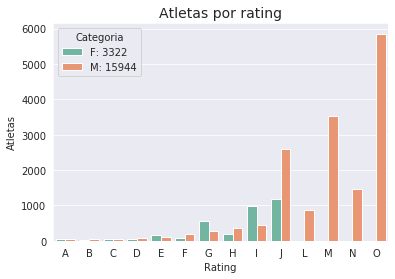

In [8]:
sns.countplot(data = df[['Categoria', 'Rating']], x='Rating', hue='Categoria', palette=("Set2"))
plt.ylabel('Atletas')
plt.title('Atletas por rating', fontsize=14)
plt.legend(title='Categoria', labels=['F: '+str(F['Rating'].count()), 'M: '+str(M['Rating'].count())])

'''sns.countplot(data = df[(df['Rating'] <= 'J')][['Categoria', 'Rating']], x='Rating', hue='Categoria', palette=("Set2"), ax = axes[1])
axes[1].set_ylabel('Atletas')
axes[1].set_title('Atletas por rating: A ao J', fontsize=14)
axes[1].legend(title='Categoria', labels=['F: '+str(F['Rating'].count()), 'M: '+str((M['Rating']<='J').sum())])'''
plt.show()

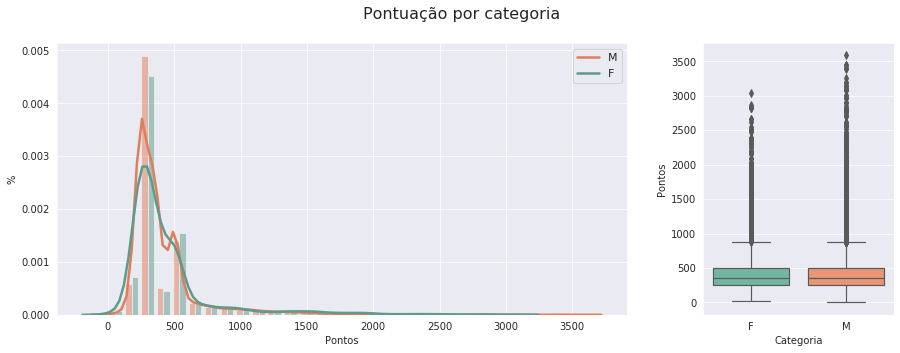

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle(('Pontuação por categoria'), fontsize=16)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

sns.distplot(M['Pontos'], hist = False, norm_hist=True, ax = axes[0], label='M', color='xkcd:dark peach')
sns.distplot(F['Pontos'], hist = False, norm_hist=True, ax = axes[0], label='F', color='xkcd:gray teal')
axes[0].hist([M['Pontos'], F['Pontos']], bins = 30, density=True, color=['xkcd:dark peach','xkcd:gray teal'], alpha=0.5)
axes[0].set_ylabel('%')
axes[0].legend(loc='best')

sns.boxplot(x = 'Categoria', y = 'Pontos', data = df, palette=("Set2"),  linewidth=1.2, ax = axes[1])
plt.show()

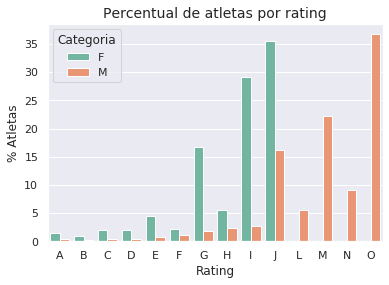

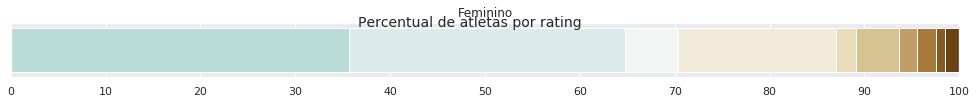

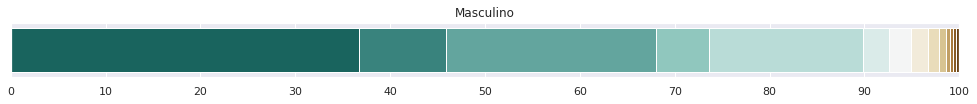

10.87% das mulheres estão na metade de cima do rating
5.06% dos homens estão na metade de cima do rating

O foco da falta de mulheres é nas categorias iniciantes?


In [10]:
sns.barplot(data = pd.concat([byRatF['%'], byRatM['%']]).reset_index(), y = '%', x = 'Rating', hue='Categoria', palette=("Set2")) 
plt.ylabel('% Atletas')
plt.xlabel('Rating')
plt.title('Percentual de atletas por rating', fontsize=14)
#plt.xaxis.grid(False)
plt.show()

cumsumF = 100 - np.cumsum(byRatF['%']).values
cumsumF = np.concatenate([[100],cumsumF])

cumsumM = 100 - np.cumsum(byRatM['%']).values
cumsumM = np.concatenate([[100],cumsumM])

plt.figure(figsize = (17,1))
plt.xlim(0,100)  
for i in range(len(cumsumF)):
    sns.barplot(x = cumsumF[i], color = sns.color_palette("BrBG", 15)[i])      
plt.xticks(np.arange(0, 101,10))  
plt.suptitle('Percentual de atletas por rating', fontsize=14)
plt.title('Feminino')
plt.show()

plt.figure(figsize = (17,1))
plt.xlim(0,100)  
for i in range(len(cumsumM)):
    sns.barplot(x = cumsumM[i], color = sns.color_palette("BrBG", 15)[i])
    
plt.xticks(np.arange(0, 101,10))
plt.title('Masculino')
plt.show()


print(f"{((F['Rating'] <= 'E').sum() / F['Rating'].count() * 100):.2f}% das mulheres estão na metade de cima do rating")
print(f"{((M['Rating'] <= 'G').sum() / M['Rating'].count() * 100):.2f}% dos homens estão na metade de cima do rating")
print("\nO foco da falta de mulheres é nas categorias iniciantes?")

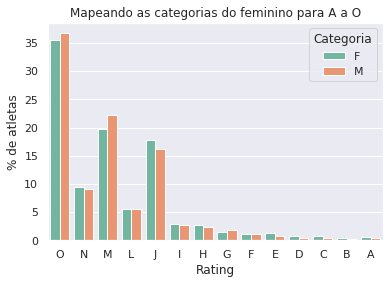

O foco da falta de mulheres é nas categorias iniciantes? Não


In [11]:
#Removing the first man in rating J because either his pontuation (350) or his rating are wrong, so he would mess
#up the mapping function (rating J <= 250 pts)
idx = (M[(M['Rating'] == 'O') & (M['Colocação'] == 1)]).index
M = M.drop(index=idx, axis=1)

ratingMap = M.groupby('Rating')['Pontos'].max()
labels = ratingMap[::-1].index
values = ratingMap[::-1].values
values = np.concatenate([[0], values])
Fmapped = F.copy()
Fmapped['Rating'] = pd.cut(F['Pontos'].rename('Rating'), values, labels=labels)

mappedByRatF = pd.DataFrame(Fmapped.groupby(['Categoria','Rating']).count().iloc[:, 0].rename('Atletas'))
mappedByRatF['%'] = mappedByRatF['Atletas'] / len(Fmapped) * 100

sns.barplot(data = pd.concat([mappedByRatF['%'][::-1], byRatM['%']]).reset_index(), y = '%', x = 'Rating', hue='Categoria', palette=("Set2")) 
plt.ylabel('% de atletas')
plt.title('Mapeando as categorias do feminino para A a O')
plt.show()

print("O foco da falta de mulheres é nas categorias iniciantes? Não")

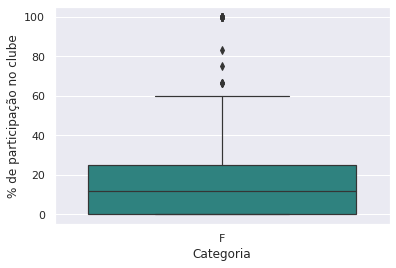

In [12]:
df_clubes = (df.groupby(['Clube', 'Categoria'])['Nome'].count() / df.groupby(['Clube'])['Nome'].count())\
                     .rename('%')\
                     .mul(100)

new_idx = pd.MultiIndex.from_product([df_clubes.index.levels[0],
                                      ['F', 'M']], 
                                      names=['Clube', 'Categoria'])

df_clubes = df_clubes.reindex(new_idx).fillna(0).reset_index()
df_clubes = df_clubes.query('Categoria == "F"')

sns.boxplot(x = 'Categoria', y = '%', data = df_clubes, palette=("viridis_r"),  linewidth=1.2)
plt.ylabel('% de participação no clube')
plt.show()

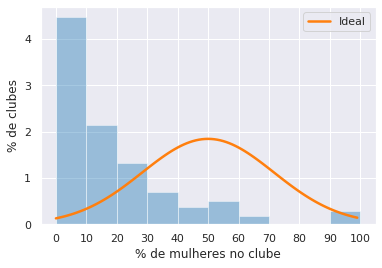

In [13]:
plt.grid(True)
sns.distplot(df_clubes['%'], bins = 10, kde = False, norm_hist=True)
plt.xticks(np.arange(0,101,10))
plt.yticks(np.arange(0, 0.05, 0.01), np.arange(0, 10, 1))

from scipy.stats import norm

x_axis = np.arange(0, 100, 1)
# Mean = 0, SD = df_clubes['%'].std()
plt.plot(x_axis, norm.pdf(x_axis, 50, df_clubes['%'].std()), label = 'Ideal')
plt.legend()

plt.ylabel('% de clubes')
plt.xlabel('% de mulheres no clube')
plt.show()

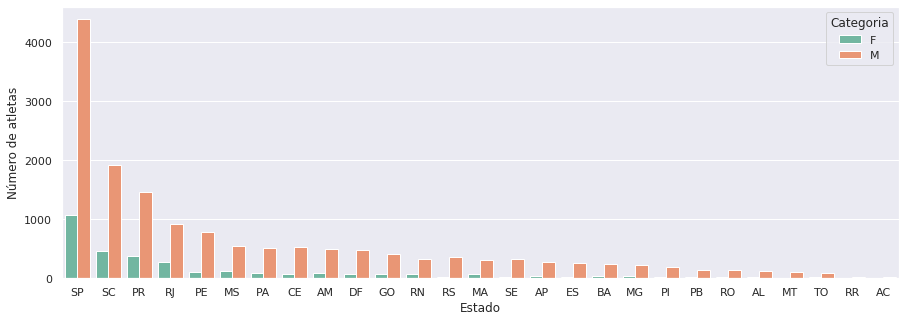

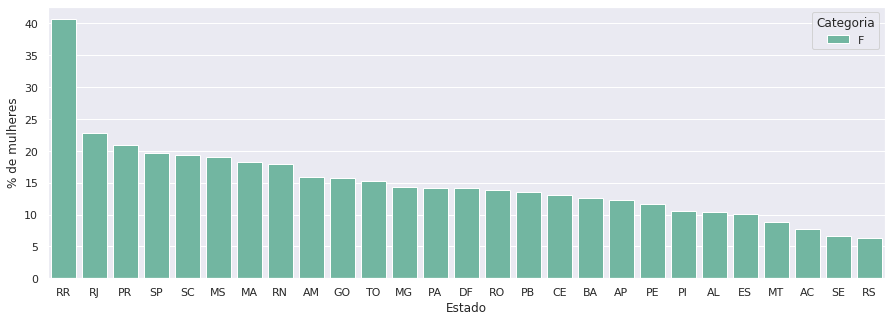

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data = df[['Estado', 'Categoria']], x='Estado', hue='Categoria', palette=("Set2"),
             order = df['Estado'].value_counts().index)
plt.ylabel('Número de atletas')
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(data = df.groupby(['Estado'])['Categoria']
                     .value_counts(normalize=True)
                     .rename('% de mulheres')
                     .mul(100)
                     .reset_index()
                     .query('Categoria == "F"')
                     .sort_values('% de mulheres', ascending = False), 
                     y = '% de mulheres', x = 'Estado', hue='Categoria', palette=("Set2")) 
plt.show()

In [15]:
df.groupby(['Idade', 'Categoria']).count()['Nome'].rename('count').reset_index()

,Idade,Categoria,count
0,-36.0,M,1
1,-34.0,M,1
2,-30.0,M,1
3,3.0,F,1
4,3.0,M,5
...,...,...,...
184,101.0,M,1
185,120.0,F,1
186,121.0,F,82
187,121.0,M,362


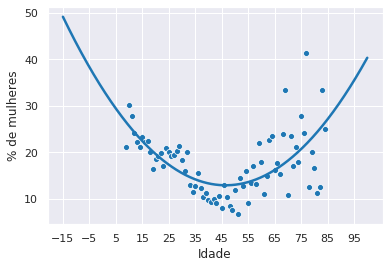

In [16]:
min_age = 8
max_age = 85

age_sex = df[(df['Idade'] > min_age) & (df['Idade'] < max_age)]
age_sex = (age_sex.groupby(['Idade', 'Categoria'])['Nome'].count() / age_sex.groupby(['Idade'])['Nome'].count())\
                     .rename('%')\
                     .mul(100)

new_idx = pd.MultiIndex.from_product([age_sex.index.levels[0],
                                      ['F', 'M']], 
                                      names=['Idade', 'Categoria'])

age_sex = age_sex.reindex(new_idx).fillna(0).reset_index()
age_sex_F = age_sex.query('Categoria == "F"')

sns.scatterplot(data = age_sex_F, x = 'Idade', y = '%')

model = np.poly1d(np.polyfit(age_sex_F['Idade'], age_sex_F['%'], 2))
line = np.linspace(-15, 100, 600)
plt.plot(line, model(line))
plt.ylabel('% de mulheres')
plt.xticks(np.arange(-15, 101,10)) 
plt.show()

### Championships

In [17]:
eventos_not_null = len(df[df['Eventos'].notnull()]) / len(df)
print(f'{eventos_not_null*100}% of all athletes have any participation in championships registered')

43.273123637496106% of all athletes have any participation in championships registered


Transforming the json from each athlete containing his/her championships into a database

In [18]:
dfs_list = []
for row in df[df['Eventos'].notnull()][['Eventos']].itertuples():
    chs = pd.DataFrame(eval(row[1]))
    chs['index'] = row[0]
    chs = chs.rename(columns={'Nome':'Campeonato'})
    dfs_list.append(chs)

Crating a database with every participation in a championship from every athlete alongside with his/her personal info

In [19]:
df_championships = pd.concat(dfs_list)
df_championships = pd.merge(left=df_championships, 
                            right=df.drop(columns = ['Eventos']).reset_index(), 
                            how='left', left_on='index', right_on='index')

Processing data from 'gain', 'initial points' and 'final points' to become numerical and signing NaN to missing values

In [20]:
df_championships['Inicial'] = pd.to_numeric(df_championships['Inicial'].str.replace(r'\D', ''), errors='coerce')
df_championships['Final'] = pd.to_numeric(df_championships['Final'].str.replace(r'\D', ''), errors='coerce')
df_championships['Ganho'] = pd.to_numeric(df_championships['Ganho'], errors='coerce')

In [21]:
df_championships = df_championships.rename(columns={'index':'ID atleta'})
df_championships

,Data,Campeonato,Inicial,Ganho,Final,ID atleta,Colocação,Pontos,Nome,Clube,URL,Rating,Categoria,Estado,Idade
0,13/12/2019,Campeonato Brasileiro 2019 - Individual Olímpico,2675,360.0,3035.0,0,1,3035,JESSICA YAMADA,FUNDAÇÃO MUNICIPAL DE ESPORTES DE CONCÓRDIA-SC,https://app.cbtm.org.br/UI/Site/RatingResultad...,A,F,SC,31.0
1,11/12/2019,Campeonato Brasileiro Equipes De Clubes Olímpi...,2630,54.0,2684.0,0,1,3035,JESSICA YAMADA,FUNDAÇÃO MUNICIPAL DE ESPORTES DE CONCÓRDIA-SC,https://app.cbtm.org.br/UI/Site/RatingResultad...,A,F,SC,31.0
2,11/12/2019,Campeonato Brasileiro Equipes De Clubes Olímpi...,2621,54.0,2675.0,0,1,3035,JESSICA YAMADA,FUNDAÇÃO MUNICIPAL DE ESPORTES DE CONCÓRDIA-SC,https://app.cbtm.org.br/UI/Site/RatingResultad...,A,F,SC,31.0
3,27/11/2018,52º Brasileiro De Tm 2018 - Ranking Olímpico,2581,40.0,2621.0,0,1,3035,JESSICA YAMADA,FUNDAÇÃO MUNICIPAL DE ESPORTES DE CONCÓRDIA-SC,https://app.cbtm.org.br/UI/Site/RatingResultad...,A,F,SC,31.0
4,27/11/2018,52º Brasileiro De Tm 2018 - Equipes De Clubes ...,2509,80.0,2589.0,0,1,3035,JESSICA YAMADA,FUNDAÇÃO MUNICIPAL DE ESPORTES DE CONCÓRDIA-SC,https://app.cbtm.org.br/UI/Site/RatingResultad...,A,F,SC,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,11/04/2013,Copa Brasil Sul Sudeste I - Santos 2013 - Rank...,0,0.0,0.0,19262,5854,0,ALBERTO ARATA,JUNDIAÍ CLUBE-SP,https://app.cbtm.org.br/UI/Site/RatingResultad...,O,M,SP,73.0
71232,10/03/2008,COPA MINAS GERAIS - ETAPA BH,0,0.0,0.0,19263,5854,0,ANGELO REIS,MINAS TÊNIS CLUBE - MG,https://app.cbtm.org.br/UI/Site/RatingResultad...,O,M,MG,20.0
71233,08/04/2010,EVENTOS - COPA BRASIL MARILIA (INDIVIDUAL) 2010,0,0.0,0.0,19264,5854,0,FERNANDO RIBEIRO,ASSOC. NOVA ERA DE T.M.-SP,https://app.cbtm.org.br/UI/Site/RatingResultad...,O,M,SP,28.0
71234,15/09/2011,5º Etapa Do Campeonato Paranaense 2011,0,0.0,0.0,19265,5854,0,MARCIO NAKAMURA,ASSOC. DOS MESATENISTAS DE CASCÁVEL-PR,https://app.cbtm.org.br/UI/Site/RatingResultad...,O,M,PR,55.0


In [22]:
#df_championships.to_csv('Eventos.csv')